# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    f = (x**2)*numpy.sin(x)
    return f;
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    g = 2*x*numpy.sin(x) + (2-x**2)*numpy.cos(x) - 2
    return g;
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    h = g(xmax)-g(xmin)
    return h;
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [33]:
def integrate_numeric(xmin, xmax, N):
    simp=0
    d = (xmax-xmin)/(2*N)
    for i in range (0,2*N+1):
        x_i = xmin + i*d
        if i == 0:
            simp = simp + f(x_i)
        elif i == 2*N:
            simp = simp + f(x_i)
        elif i % 2 ==0:
            simp = simp + 2*f(x_i)
        else:
            simp = simp + 4*f(x_i)
    simp = (d/3) * simp
    return simp;
    


    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE

Make sure you have implemented Simpson's rule correctly:

In [22]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [55]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


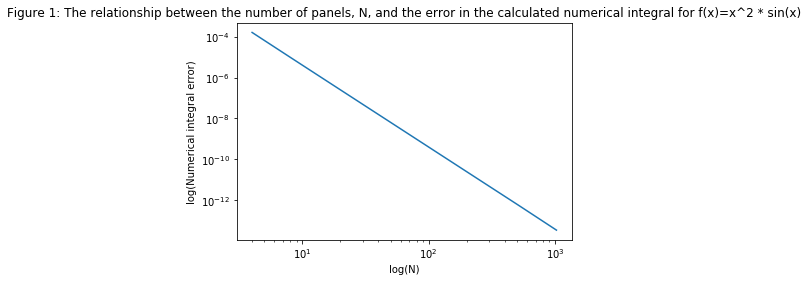

In [88]:
from matplotlib import pyplot as pp
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024] # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numeric = []
for i in range (0,9):
    result_numeric.append(integrate_numeric(x0,x1, panel_counts[i]))
plt.plot(panel_counts, (result_analytic-result_numeric)/result_analytic)
plt.xlabel("log(N)")
plt.ylabel("log(Numerical integral error)")
plt.title("Figure 1: The relationship between the number of panels, N, and the error in the calculated numerical integral for f(x)=x^2 * sin(x)")
pp.yscale('log')
pp.xscale('log')


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

YOUR ANSWER HERE